In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## advertising

In [ ]:
# https://www.datarobot.com/blog/multiple-regression-using-statsmodels/
!wget -O advertising.csv 'https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv'

--2022-10-08 15:39:14--  https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘advertising.csv’

advertising.csv     100%[===================>]   5.04K  --.-KB/s    in 0s      

2022-10-08 15:39:14 (51.2 MB/s) - ‘advertising.csv’ saved [5166/5166]



In [ ]:
df = pd.read_csv('advertising.csv', index_col=0) 
X = df[['TV', 'Radio', 'Newspaper']]  #X는 행렬형태이기 때문에 대문자표기
y = df['Sales'] #y는 하나의 값, 벡터이기 때문에 소문자
df.head()
print(X)
# print(y)

        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
df.describe() #기본통계(개수, 평균, 최소값 등등)

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

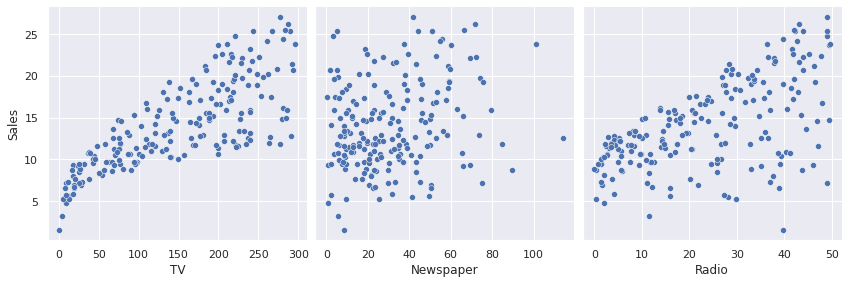

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4);

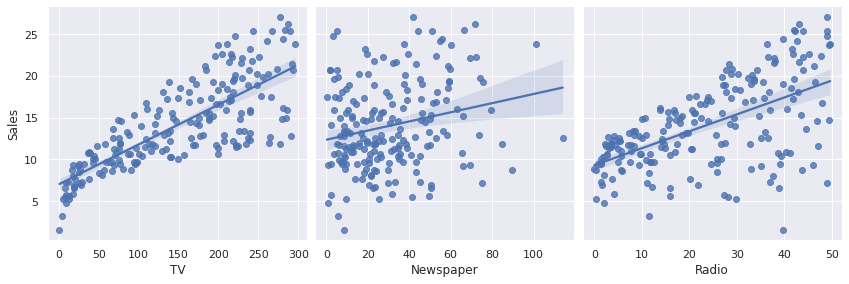

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='reg'); #kind를 써주면 경향성?(오차가 얼마정도 있는지)을 나타낼 수 있다....

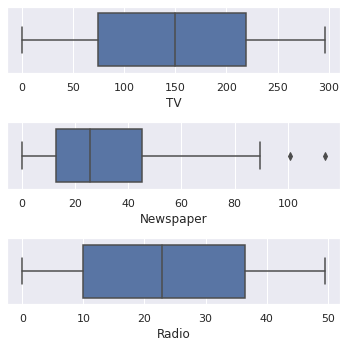

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=df['TV'], ax = axs[0])
plt2 = sns.boxplot(x=df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=df['Radio'], ax = axs[2])
plt.tight_layout()

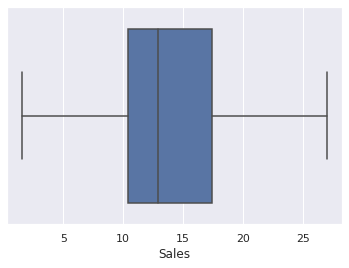

In [ ]:
sns.boxplot(x=df['Sales']);


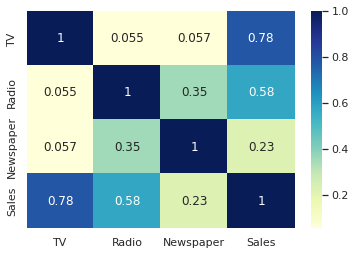

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#트레인은 학습용 데이터, 테스트는 시험보는 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70퍼센트만 돌림(test사이즈를 30프로로...)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[0.04405928 0.1992875  0.00688245]
2.7089490925159065


In [ ]:
#평가지표들
print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(X_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

MAE:     1.5116692224549086
MSE:     3.79679723671522
RMSE:    1.9485372043446387


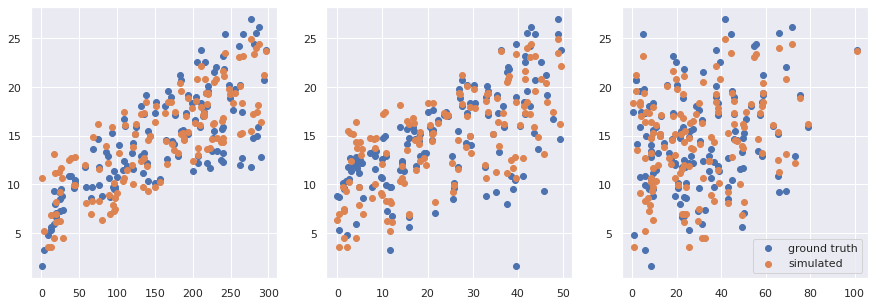

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
for i in range(3):
  axs[i].scatter(X_train.values[:,i], y_train, label="ground truth")
  axs[i].scatter(X_train.values[:,i], lr.predict(X_train), label="simulated")
  if i == 2:
    axs[i].legend()

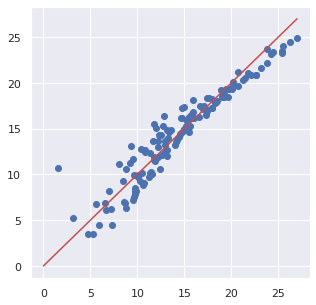

In [ ]:
fig, axs = plt.subplots(1, figsize = (5,5))
# 정답이 이미 나와있고 그부분을 확인차 머신러닝을 돌린것이기 때문에 기울기는 무조건 1이 되어야한다.
axs.plot([0, max([np.max(y_train), np.max(lr.predict(X_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(X_train))])], "r")
axs.scatter(y_train, lr.predict(X_train))

In [ ]:
#머신러닝과 같은 모델이지만 딥러닝으로 돌리는 부분
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential([
  Dense(1),
  Dense(16),
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=200 # epochs 복수형으로 쓰기!
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 1s 52ms/step - loss: 3138.9966 - val_loss: 621.0397
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 502.7163 - val_loss: 377.5494
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 362.0826 - val_loss: 329.3523
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 293.9947 - val_loss: 169.6994
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 183.1073 - val_loss: 109.4296
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 117.0377 - val_loss: 88.5217
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 76.5020 - val_loss: 113.6012
Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 75.6747 - val_loss: 74.9117
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 46.6070 - val_loss: 36.3122
Epoch 10/200
5/5 [==============================] - 0s 8ms/step - loss: 35.8964 - val_loss: 31.6872
Epoch

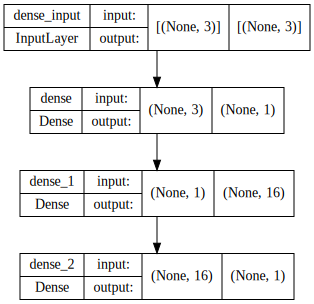

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg'))

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_dl = model.predict(X_test)

In [ ]:
# 평가지표
print("MAE:    ", metrics.mean_absolute_error(y_test, y_pred_lr))
print("MSE:    ", metrics.mean_squared_error(y_test, y_pred_lr))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE:     1.5116692224549086
MSE:     3.79679723671522
RMSE:    1.9485372043446387


In [ ]:
# 평가지표
print("MAE:    ", metrics.mean_absolute_error(y_test, y_pred_dl))
print("MSE:    ", metrics.mean_squared_error(y_test, y_pred_dl))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_dl)))

MAE:     1.6286059792836505
MSE:     3.9545148303244364
RMSE:    1.9885961958940876


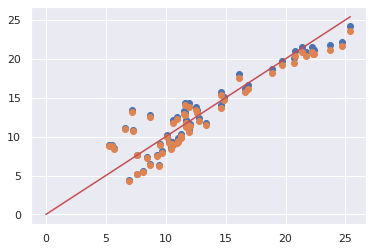

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, max([np.max(y_test), np.max(y_pred_lr), np.max(y_pred_dl)])],
         [0, max([np.max(y_test), np.max(y_pred_lr), np.max(y_pred_dl)])], "r")
plt.scatter(y_test, y_pred_lr)
plt.scatter(y_test, y_pred_dl)

plt.show()

MAE:     1.1581502948072526
MSE:     2.4793551789057866
RMSE:    1.574596830590544
MAE:     1.2801741184507098
MSE:     2.6594815353279917
RMSE:    1.6307916897409036


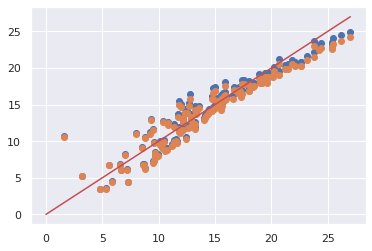

In [ ]:
plt.plot([0, max([np.max(y_train), np.max(lr.predict(X_train)), np.max(model.predict(X_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(X_train)), np.max(model.predict(X_train))])], "r")
plt.scatter(y_train, lr.predict(X_train))
plt.scatter(y_train, model.predict(X_train))
print("MAE:    ", metrics.mean_absolute_error(y_train, lr.predict(X_train)))
print("MSE:    ", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print("MAE:    ", metrics.mean_absolute_error(y_train, model.predict(X_train)))
print("MSE:    ", metrics.mean_squared_error(y_train, model.predict(X_train)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, lr.predict(X_test)))
print(r2_score(y_test, model.predict(X_test)))

0.8609466508230368
0.8551704246386577


## FremontBridge

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -o BicycleWeather.csv https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2725k    0 2725k    0     0   940k      0 --:--:--  0:00:02 --:--:--  940k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229k  100  229k    0     0   324k      0 --:--:-- --:--:-- --:--:--  324k


In [ ]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

(8.0, 17.0)

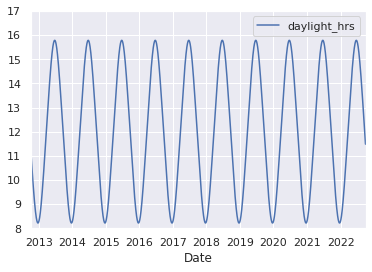

In [ ]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [ ]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [ ]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

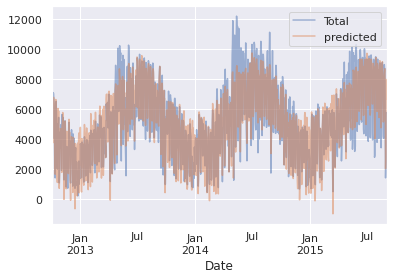

In [ ]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [ ]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             1009.765512
Tue             1220.467872
Wed             1185.347283
Thu              964.716230
Fri              355.960691
Sat            -2206.603421
Sun            -2267.134492
holiday        -2374.802762
daylight_hrs     257.703022
PRCP           -1329.669764
dry day         1095.397185
Temp (C)         130.325582
annual            53.885426
dtype: float64

In [ ]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [ ]:

print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon           1010.0  173.0
Tue           1220.0  166.0
Wed           1185.0  166.0
Thu            965.0  170.0
Fri            356.0  162.0
Sat          -2207.0  159.0
Sun          -2267.0  166.0
holiday      -2375.0  326.0
daylight_hrs   258.0   18.0
PRCP         -1330.0  125.0
dry day       1095.0   66.0
Temp (C)       130.0    7.0
annual          54.0   35.0


## mtcars

https://cran.r-project.org/web/packages/explore/vignettes/explore_mtcars.html

In [ ]:
import statsmodels.api as sm
import pandas as pd
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 과제 1

선형모델을 활용하여, wt로 mpg를 예측하시오

[-6.27079017]
39.523687274902635


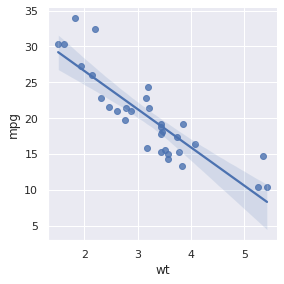

In [ ]:
#wt는 차의 무게,
sns.pairplot(df, x_vars=['wt'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
X=df['wt']
X = X.values.reshape(-1,1)
y=df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 
# X_train= X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)


lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_) #직선의 기울기
print(lr.intercept_) #직선의 절편


In [ ]:
y_pred = lr.predict(X_train)
y_pred

array([15.82010042, 14.00157127, 15.44385301, 21.49516553, 24.97545407,
       26.1041963 , 19.36309687, 17.45050587, 30.03598174, 17.98352303,
       29.39636115, 22.09089059, 24.0661895 , 19.51986662, 17.95216908,
        6.60203887, 19.64528243, 28.01678731, 17.13696636])

In [ ]:
lr.fit(X_train, y_train)
score = lr.score(X_train, y_train)
print("데이터와 선형회귀 직선의 관계점수: {:.1%}".format(score))
print("y = {}* X + {:.2f}".format(lr.coef_.round(2), lr.intercept_))

데이터와 선형회귀 직선의 관계점수: 81.9%
y = [-6.27]* X + 39.52


In [ ]:
#평가지표들
print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(X_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

MAE:     2.867798264967992
MSE:     14.311794161719384
RMSE:    3.783093200242281


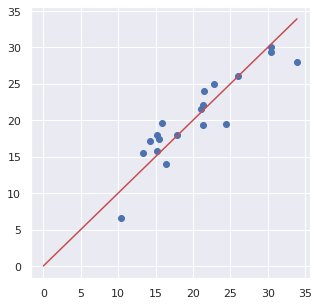

In [ ]:
fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(X_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(X_train))])], "r")
axs.scatter(y_train, lr.predict(X_train))

## 과제 2

선형모델을 활용하여, hp로 mpg를 예측하시오

[-0.08055319]
31.583296310434534
데이터와 선형회귀 직선의 관계점수: 60.2%
y = [-0.07]* X + 30.10
MAE:     2.691006232351813
MSE:     13.204202516346385
RMSE:    3.6337587311689235


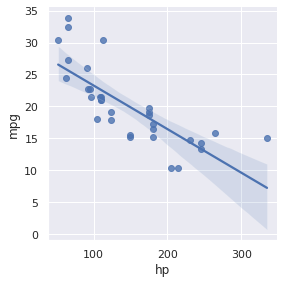

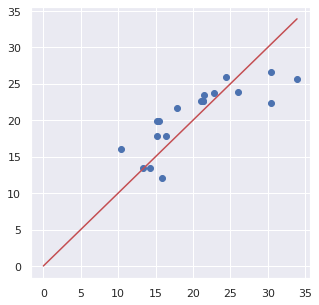

In [ ]:
#hp는 연비가 안좋다는...?, 1번과 코드 매우 유사. wt를 hp로만 바꾸면 됨
sns.pairplot(df, x_vars=['hp'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
X=df['hp']
X = X.values.reshape(-1,1)
y=df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 
# X_train= X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)


lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_) #직선의 기울기
print(lr.intercept_) #직선의 절편

lr.fit(X,y)
score = lr.score(X, y)
print("데이터와 선형회귀 직선의 관계점수: {:.1%}".format(score))
print("y = {}* X + {:.2f}".format(lr.coef_.round(2), lr.intercept_))

#평가지표들
print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(X_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(X_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(X_train))])], "r")
axs.scatter(y_train, lr.predict(X_train))

## 과제 3

변수를 조합하여 mpg를 예측하는 최선의 선형회귀 모델을 찾아보시오. (최대 2차 다항식까지 허용)

- **r2score와 RMSE를 출력할 것**

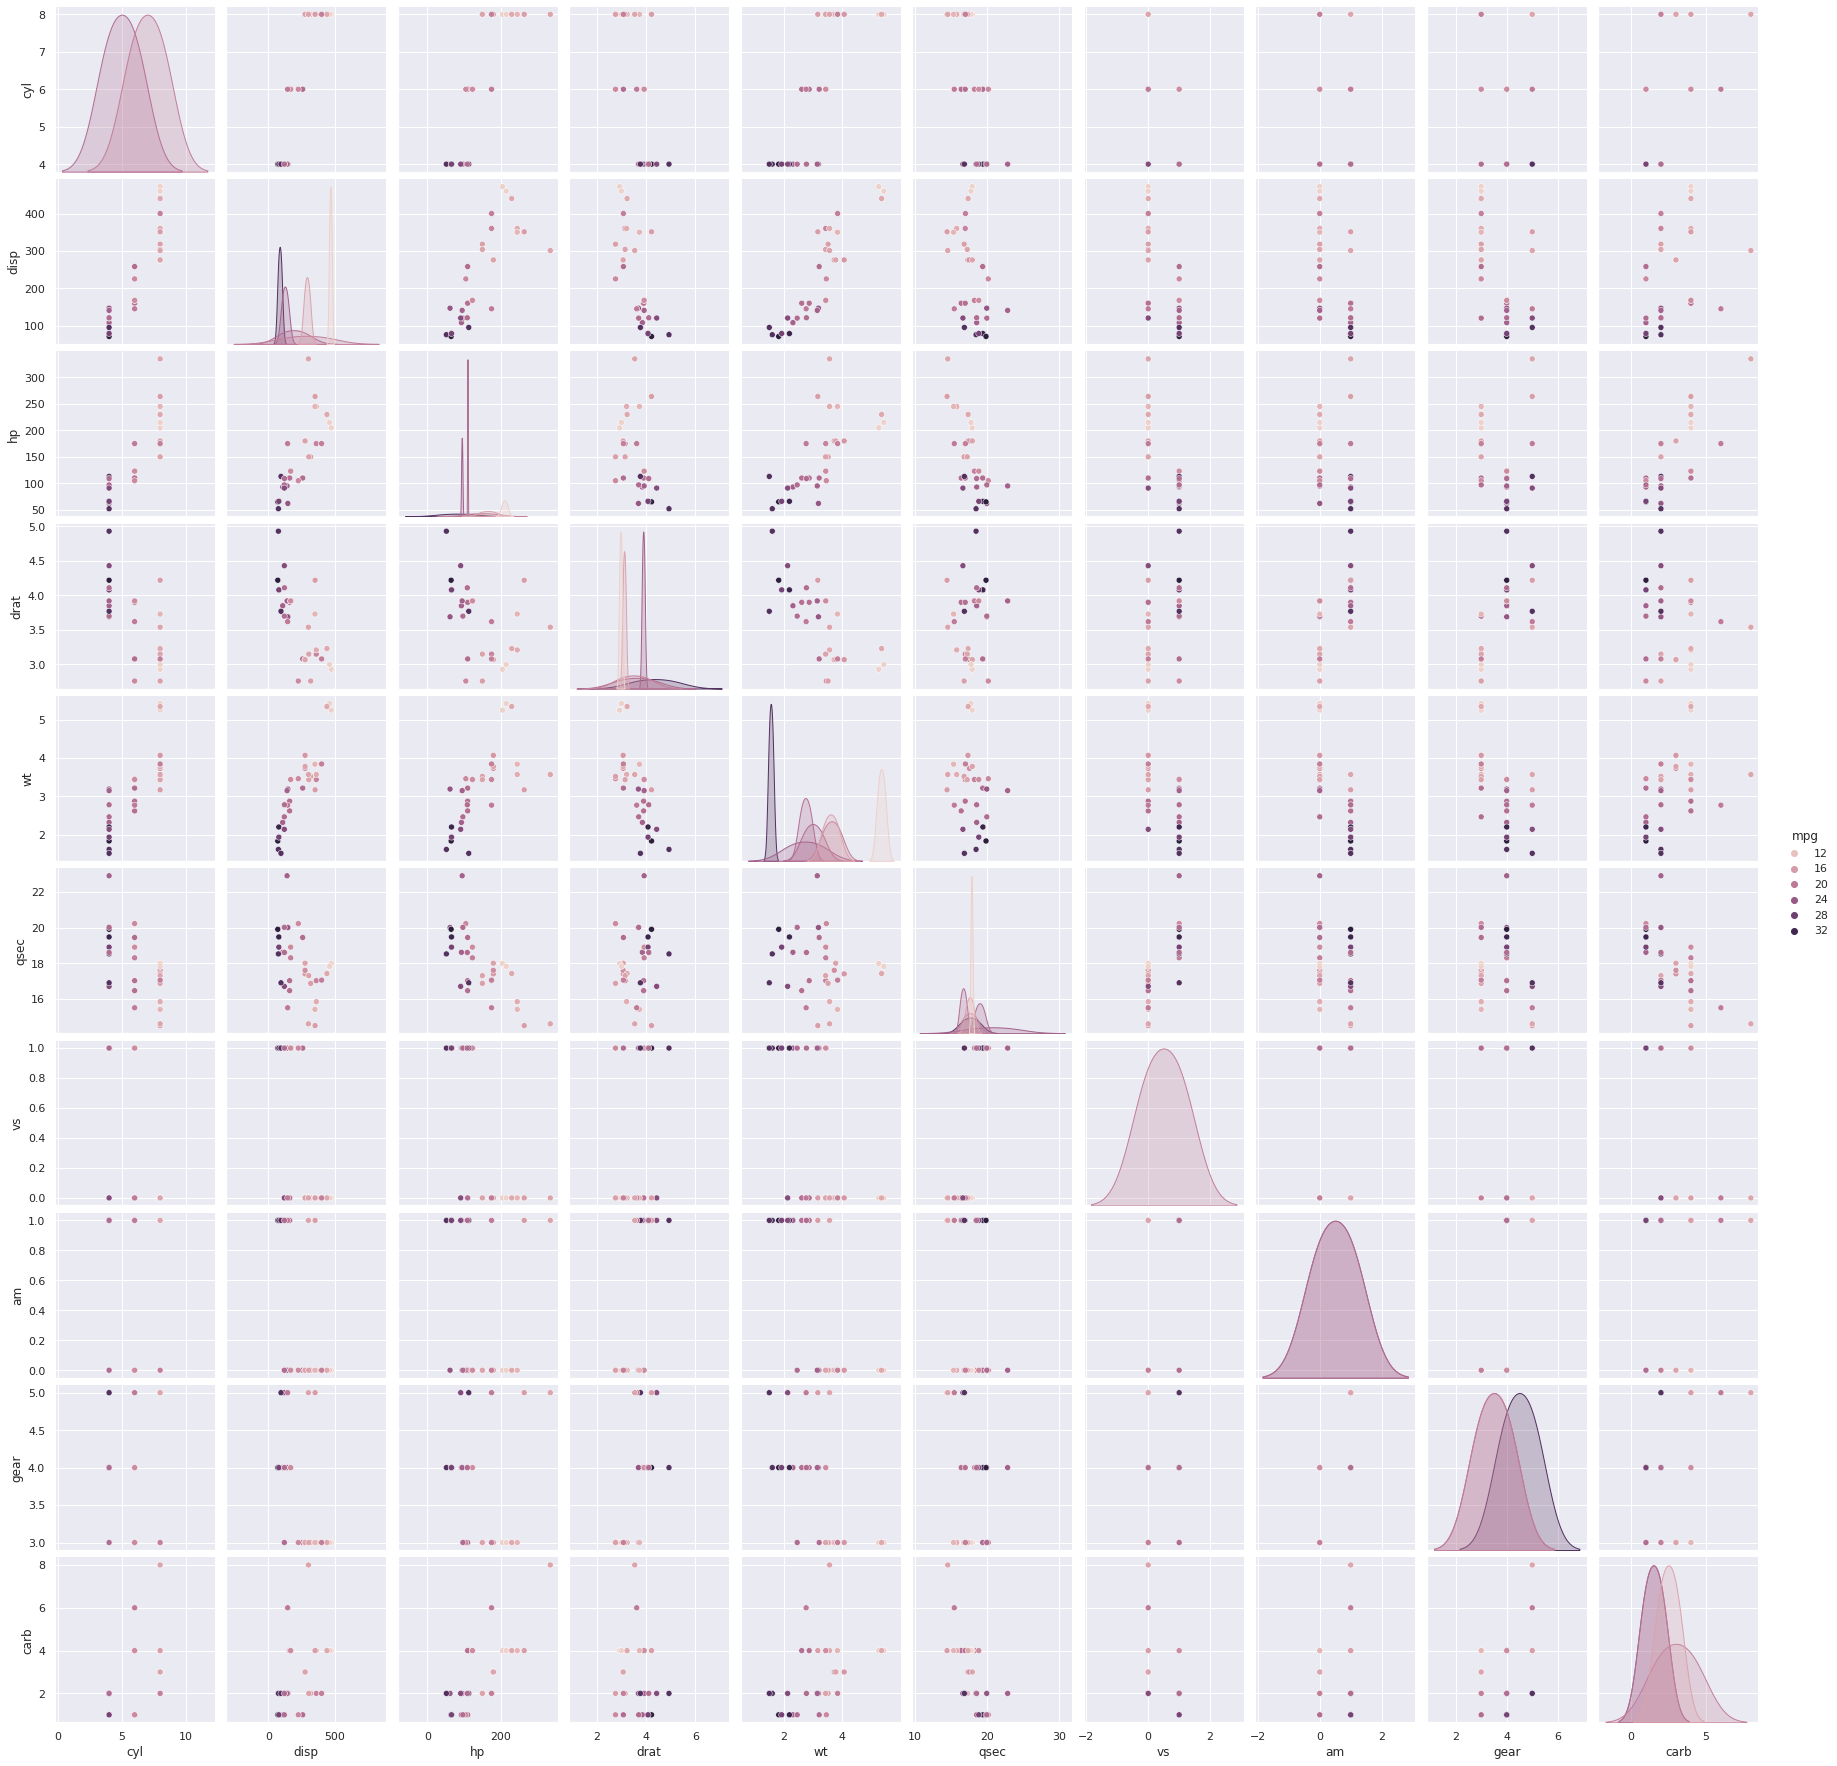

In [ ]:
import seaborn as sns
import pandas as pd
sns.pairplot(df, hue='mpg')
#데이터가 연속되는 값이 아닌경우 일렬로 그래프가 그려질 수 있음...

In [ ]:
print(df['mpg'].corr(df['cyl']))
print(df['mpg'].corr(df['disp']))
print(df['mpg'].corr(df['hp']))
print(df['mpg'].corr(df['drat']))
print(df['mpg'].corr(df['wt']))
print(df['mpg'].corr(df['qsec']))
print(df['mpg'].corr(df['vs']))
print(df['mpg'].corr(df['am']))
print(df['mpg'].corr(df['gear']))
print(df['mpg'].corr(df['carb']))
#상관계수가.... drat,vs,am,gear,qsec 가 가장 높게 나오긴 했는데....

-0.8521619594266132
-0.8475513792624785
-0.7761683718265865
0.6811719078067495
-0.8676593765172281
0.4186840339217781
0.6640389191275927
0.599832429454648
0.4802847573388421
-0.5509250739024586


MAE:     2.464245951417005
MSE:     9.48755534339708
RMSE:    3.080187550036049


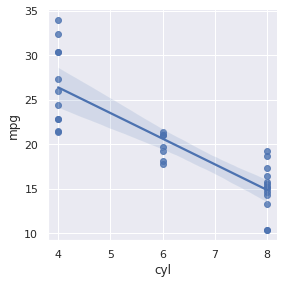

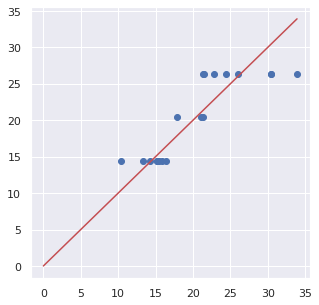

In [ ]:
from sklearn.metrics import r2_score

# cyl로 mpg값 예측
sns.pairplot(df, x_vars=['cyl'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
C=df['cyl']
C = C.values.reshape(-1,1)
y=df['mpg']

C_train, C_test, y_train, y_test = train_test_split(C, y, test_size=0.4, random_state=42) 

lr = LinearRegression()
lr.fit(C_train, y_train)

print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(C_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(C_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(C_test))))

fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(C_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(C_train))])], "r")
axs.scatter(y_train, lr.predict(C_train))

# => 탈락!

MAE:     2.4880301973835297
MSE:     8.800528050032785
RMSE:    2.9665683963180056
R2_score:      0.7390473412471461


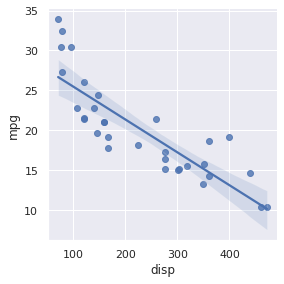

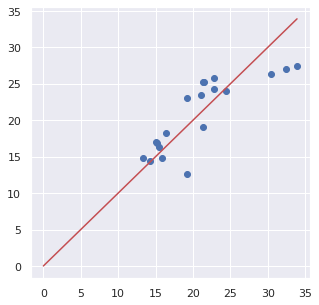

In [ ]:
# disp로 mpg값 예측
sns.pairplot(df, x_vars=['disp'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
D=df['disp']
D = D.values.reshape(-1,1)
y=df['mpg']

D_train, D_test, y_train, y_test = train_test_split(D, y, test_size=0.4, random_state=50000) 

lr = LinearRegression()
lr.fit(D_train, y_train)

print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(D_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(D_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(D_test))))
print("R2_score:     ", r2_score(y_test, lr.predict(D_test)))

fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(D_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(D_train))])], "r")
axs.scatter(y_train, lr.predict(D_train))

# => 탈락!

MAE:     2.577603552929842
MSE:     10.24521151061737
RMSE:    3.200814194953742


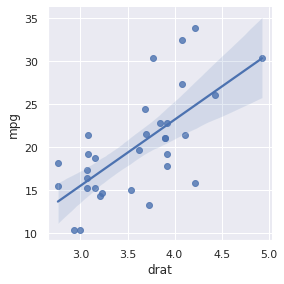

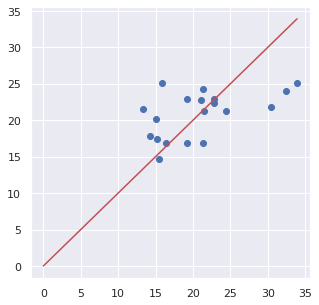

In [ ]:
# drat로 mpg값 예측
sns.pairplot(df, x_vars=['drat'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
Dr=df['drat']
Dr = Dr.values.reshape(-1,1)
y=df['mpg']

Dr_train, Dr_test, y_train, y_test = train_test_split(Dr, y, test_size=0.4, random_state=50000) 

lr = LinearRegression()
lr.fit(Dr_train, y_train)

print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(Dr_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(Dr_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(Dr_test))))

fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(Dr_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(Dr_train))])], "r")
axs.scatter(y_train, lr.predict(Dr_train))

# => 탈락!

MAE:     4.252867715061707
MSE:     27.721712536093023
RMSE:    5.26514126459044


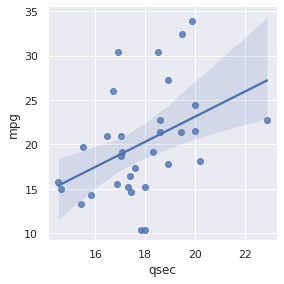

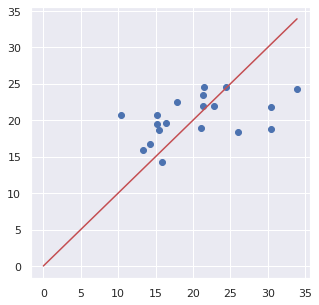

In [ ]:
# qsec로 mpg값 예측
sns.pairplot(df, x_vars=['qsec'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
Q=df['qsec']
Q = Q.values.reshape(-1,1)
y=df['mpg']

Q_train, Q_test, y_train, y_test = train_test_split(Q, y, test_size=0.4, random_state=42) 

lr = LinearRegression()
lr.fit(Q_train, y_train)

print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(Q_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(Q_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(Q_test))))

fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(Q_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(Q_train))])], "r")
axs.scatter(y_train, lr.predict(Q_train))

# => 탈락!

MAE:     4.162179487179488
MSE:     30.975122863247858
RMSE:    5.5655298816238385


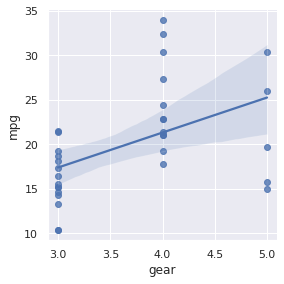

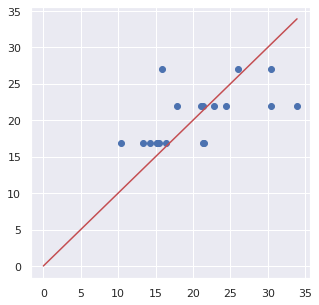

In [ ]:

# gear로 mpg값 예측
sns.pairplot(df, x_vars=['gear'], y_vars=['mpg'], height=4, aspect=1, kind='reg')
G=df['gear']
G = G.values.reshape(-1,1)
y=df['mpg']

G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.4, random_state=42) 

lr = LinearRegression()
lr.fit(G_train, y_train)

print("MAE:    ", metrics.mean_absolute_error(y_test, lr.predict(G_test)))
print("MSE:    ", metrics.mean_squared_error(y_test, lr.predict(G_test)))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(G_test))))

fig, axs = plt.subplots(1, figsize = (5,5))

axs.plot([0, max([np.max(y_train), np.max(lr.predict(G_train))])],
         [0, max([np.max(y_train), np.max(lr.predict(G_train))])], "r")
axs.scatter(y_train, lr.predict(G_train))


# => 탈락!

RMSE값이 매우 높게 측정되서 나온다....ㅠㅠㅠ
아마 데이터의 값이 너무 적어서이지 않을까...



LinearRegression()

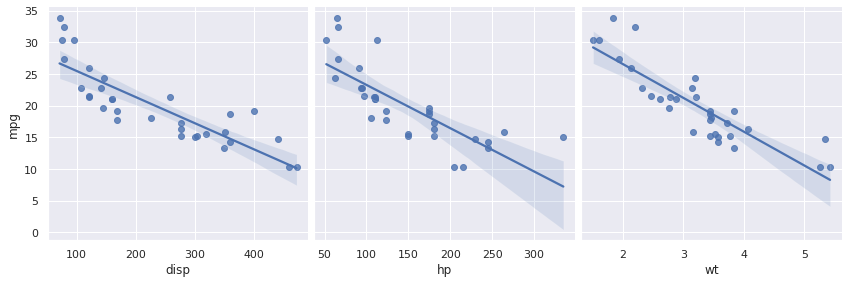

In [ ]:
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

df.head()
df.shape



sns.pairplot(df, x_vars=['disp', 'hp', 'wt'], y_vars=['mpg'], height=4, aspect=1, kind='reg')


#어떤값을 넣을건지 지정해주기
X = df[["disp", 'hp', 'wt']]
X.shape
y = df["mpg"]

#train(학습데이터)이랑 test(시험데이터)랑 분리해주는 부분(split) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

#스케일러 지정해주는 부분(호출!!)
scaler = StandardScaler()

#스케일러로 변환을 시켜주고~
X_test= scaler.fit_transform(X_test)
X_train= scaler.fit_transform(X_train)

#이제 학습시키기!(머신러닝 부분!!)
lr = LinearRegression()
lr.fit(X_train, y_train)



In [ ]:
#평가지표 계산!
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))
print("R2_score:     ", r2_score(y_test, lr.predict(X_test)))


RMSE:    2.690159254148138
R2_score:      0.748275100265767
